<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/Data_Cleaning_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as srn
import statistics as sts


In [ ]:
# importando arquivo
churn=pd.read_csv("/content/Churn.csv", sep=";", index_col=False)
churn.head(10)

#mudar os nomes das colunas

churn.columns=["Id",
               "Score",
               "Estado",
               "Genero",
               "Idade",
               "Patromonio",
               "Saldo",
               "Produtos",
               "TemCartCredito",
               "Ativo",
                "Salario",
                "Saiu"
               ]

churn.head(10)



,Id,Score,Estado,Genero,Idade,Patromonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,RS,M,50,7,0,2,1,1,1.006280e+05,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


In [ ]:
#analise exploratoria
#agrupando po estado
churn_groupby=churn.groupby(["Estado"]).size()
churn_groupby

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

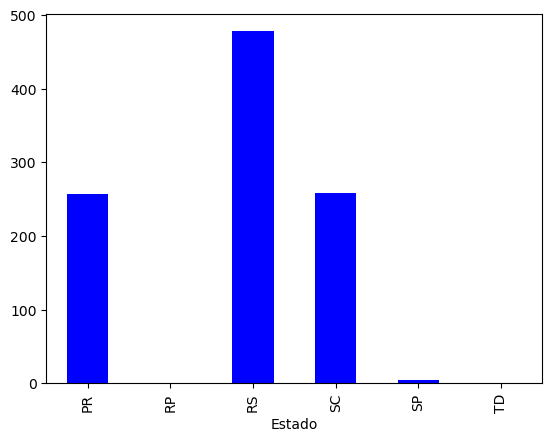

In [ ]:
#criado um grafico para visualizacao
churn_groupby.plot.bar(color="blue")

In [ ]:
#agrupando usando medida categorica genero
churn_genero=churn.groupby(["Genero"]).size()
churn_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

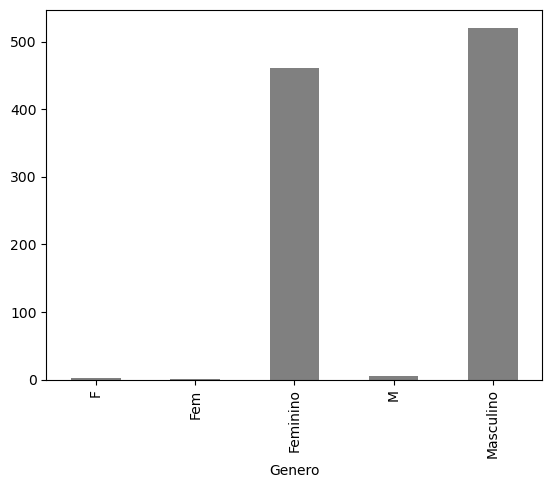

In [ ]:
churn_genero.plot.bar(color="grey")

In [ ]:
churn["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score'>

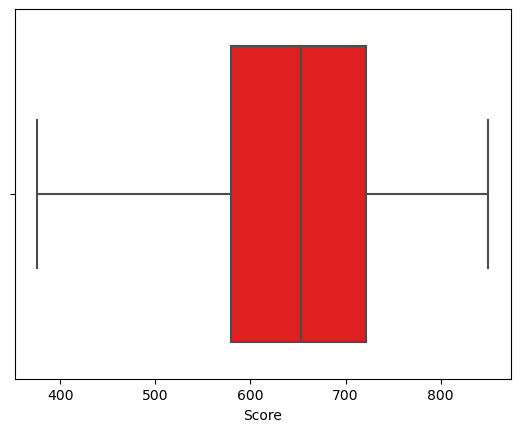

In [ ]:

srn.boxplot(churn["Score"], orient="h", color="red")

<AxesSubplot:xlabel='Score', ylabel='Count'>

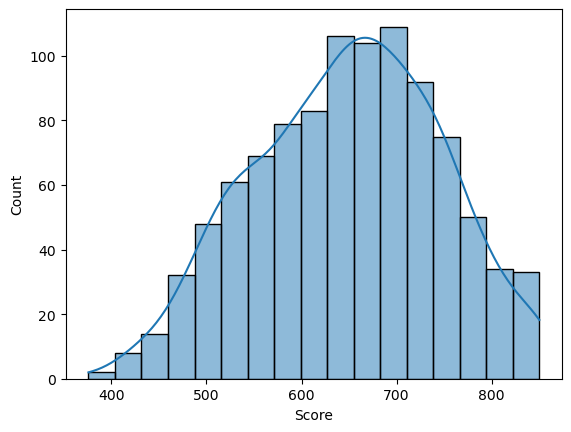

In [ ]:
srn.histplot(churn["Score"],kde=True)

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Idade'>

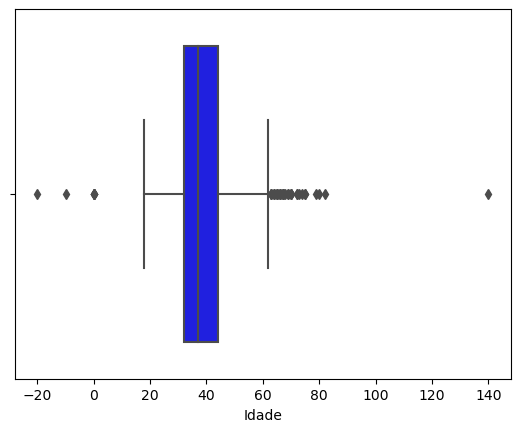

In [ ]:
#entendendo idade
churn["Idade"].describe()
srn.boxplot(churn["Idade"], orient="h" ,color="blue")

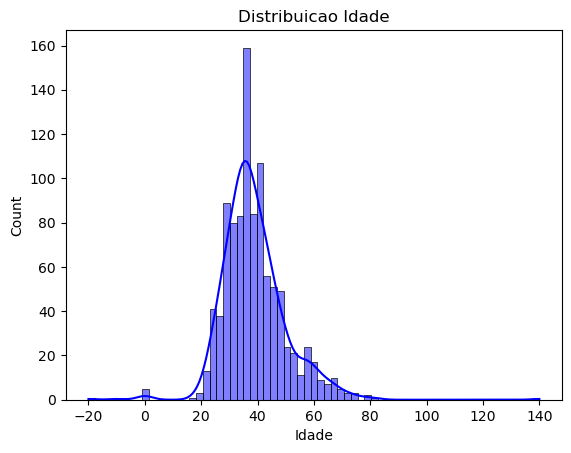

In [ ]:
srn.histplot(churn["Idade"], kde=True, color="blue").set(title="Distribuicao Idade");

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Saldo')]

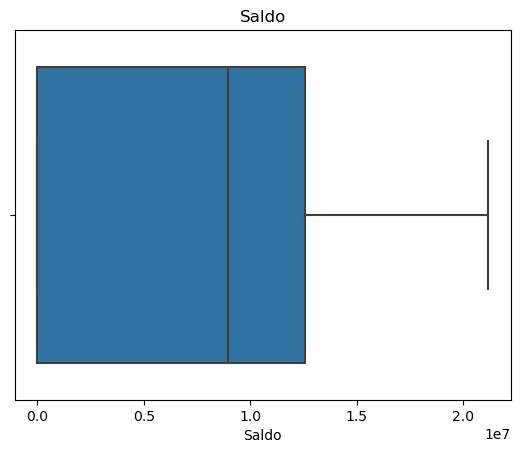

In [ ]:
#entendo saldo
churn["Saldo"].describe()
srn.boxplot(churn.Saldo, orient="h").set(title="Saldo")

[Text(0.5, 1.0, 'Saldo')]

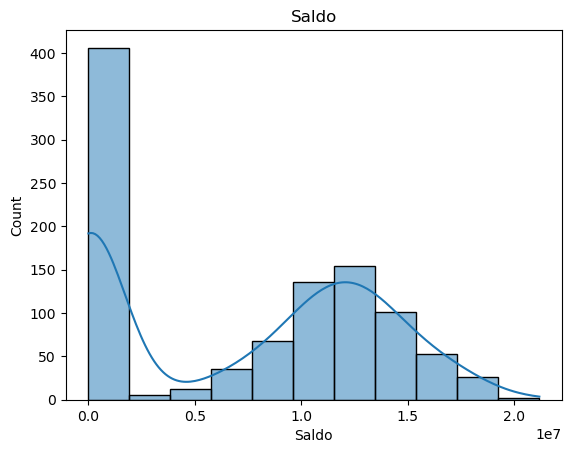

In [ ]:
srn.histplot(churn.Saldo, kde=True).set(title="Saldo")

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salario'>

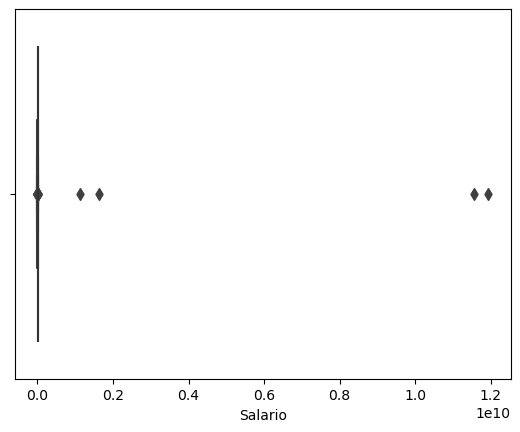

In [ ]:
#salario
churn["Salario"].describe()
srn.boxenplot(churn.Salario, orient="h")

<AxesSubplot:xlabel='Salario', ylabel='Count'>

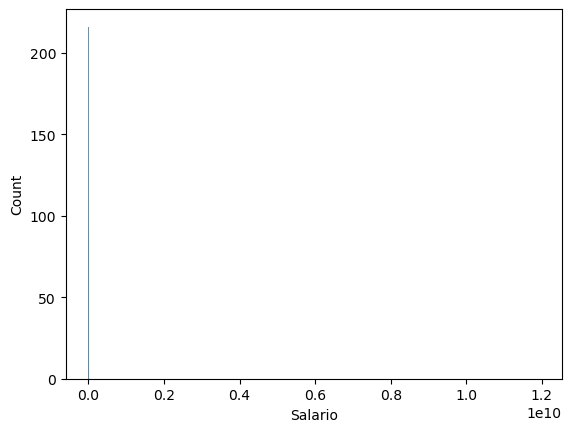

In [ ]:
srn.histplot(churn["Salario"])

In [ ]:
churn.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patromonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [ ]:
mediana=sts.median(churn.Salario)
print(mediana)
#preencher valores nao disponiveis com MEDIANA, por nao sofrer tanto com outliers
churn.Salario.fillna(mediana, inplace=True)



70518.0


In [ ]:
#corrigindo genero verificando NA
churn.Genero.isnull().sum()


8

<AxesSubplot:ylabel='Count'>

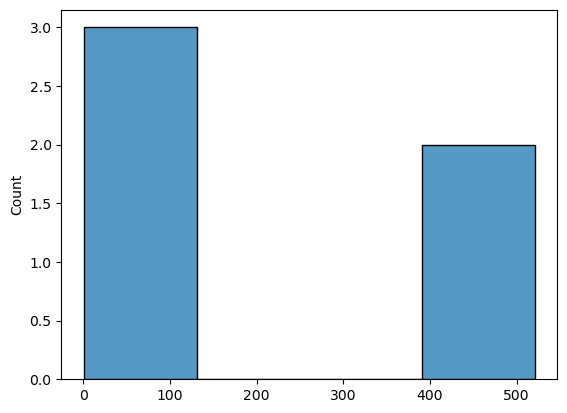

In [ ]:
#agruando os sexos para ver distribuicao
agrupado=churn.groupby(["Genero"]).size()
agrupado
srn.histplot(agrupado)

In [ ]:
#tirando os valores nulos ou Na substituindo pode Moda
moda=sts.mode(churn.Genero)
moda
churn.Genero.isnull().sum()
churn.Genero.fillna("Masculino", inplace=True)
churn.Genero.isnull().sum()



0

In [ ]:
#substituindo os valores inseridos errado.
churn.loc[churn["Genero"]=="M", "Genero"]="Masculino"
churn.loc[churn["Genero"].isin(["Fem","F"]), "Genero"]="Feminino"
#visualizo os dados substituido
agrupado=churn.groupby(["Genero"]).size()
agrupado



Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
#determinando idades fora do padrao
churn.loc[(churn["Idade"]<0) | (churn["Idade"]>120)]



,Id,Score,Estado,Genero,Idade,Patromonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#determinando a mediana
mediana_idade=sts.median(churn.Idade)
mediana_idade

37

In [ ]:
#sunbstituindo as idades fora do padrao para a mediana de idade
churn.loc[(churn["Idade"]<=0) | (churn["Idade"]>=120)]=mediana_idade
churn.Idade.describe()


count    999.000000
mean      39.089089
std       10.310270
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [ ]:
churn.loc[(churn["Idade"]<=0) | (churn["Idade"]<=120)]

agrupado_idade=churn.groupby(["Idade"]).size()


<AxesSubplot:xlabel='Idade', ylabel='Count'>

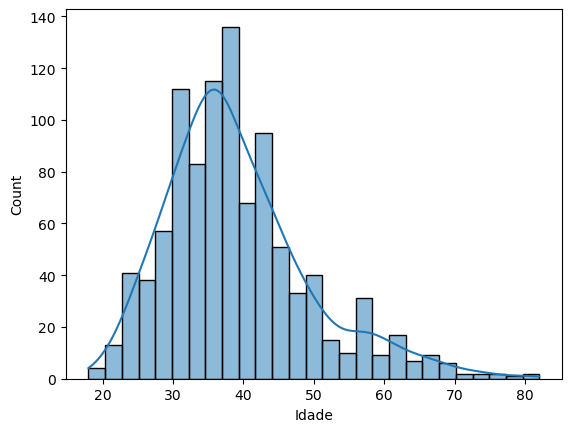

In [ ]:
srn.histplot(data=churn["Idade"], kde=True)

In [ ]:
#procurando valores duplicados
churn[churn.duplicated(["Id"],keep=False)]
churn.drop_duplicates(subset="Id", keep="first", inplace=True)
churn[churn.duplicated(["Id"],keep=False)]
churn.shape

(990, 12)

In [ ]:
#removendo estados
churn_estado=churn.groupby(["Estado"]).size()
churn_estado

churn.loc[churn["Estado"].isin(["RP","SP","TD"]), "Estado"]="RS"
churn_estado=churn.groupby(["Estado"]).size()
churn_estado


Estado
PR    255
RS    478
SC    257
dtype: int64

In [ ]:
#entendendo salario
churn["Salario"].describe()


count    9.900000e+02
mean     3.530176e+07
std      5.311170e+08
min      9.677000e+03
25%      2.872018e+06
50%      8.661099e+06
75%      1.404649e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [ ]:
#calculando desvio padrao e vendo se existe valores fora do desvio padrao
desv=sts.stdev(churn["Salario"])
desv
churn.loc[churn["Salario"]>= 2 * desv]


,Id,Score,Estado,Genero,Idade,Patromonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
#calculando a mediana para substituir os valores fora do padrao.outliers
mediana_salario=sts.median(churn["Salario"])
mediana
churn.loc[churn["Salario"] >= 2 * desv]= mediana_salario


churn.loc[churn["Salario"] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patromonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


<AxesSubplot:xlabel='Salario', ylabel='Count'>

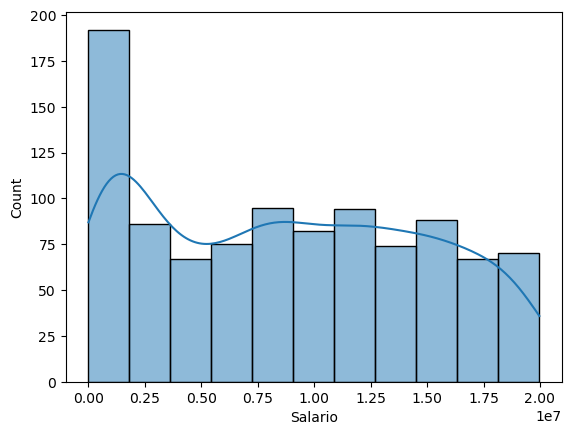

In [ ]:
srn.histplot(churn["Salario"], kde=True)

In [ ]:
churn

,Id,Score,Estado,Genero,Idade,Patromonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
